# Task 1: Exploring Gymnasium

### 1. Install Gymnasium library, and explore the available environments and main functions.

In [1]:
!pip install gymnasium[all]

In [2]:
# Import required libraries
import gymnasium as gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


### 2. Explore ‘CartPole-v1’ 

In [3]:
# Explore ‘CartPole-v1’ environment
env = gym.make('CartPole-v1', render_mode='rgb_array')

In [4]:
class RandomAgent:
    def __init__(self, env):
        self.env = env

    def run(self, steps):
        rewards = []
        observation, info = env.reset(seed=42)
        img = plt.imshow(self.env.render())
        for _ in range(steps):
            img.set_data(self.env.render())
            display.display(plt.gcf())
            display.clear_output(wait=True)
            action = self.env.action_space.sample()
            observation, reward, terminated, truncated, info = self.env.step(action)
            rewards.append(reward)
            if terminated or truncated:
                observation, info = self.env.reset()

        self.env.close()
        return rewards


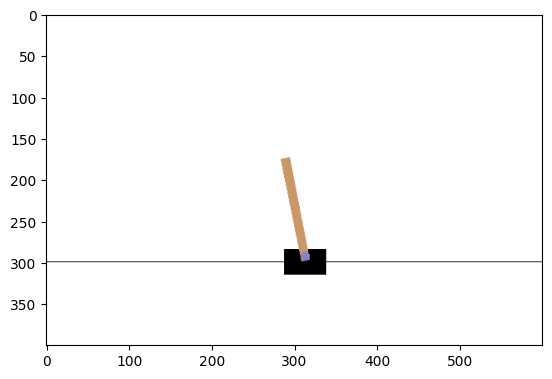

In [5]:
# Run the random agent for at least 1000 steps
agent = RandomAgent(env)

rewards = agent.run(1000)

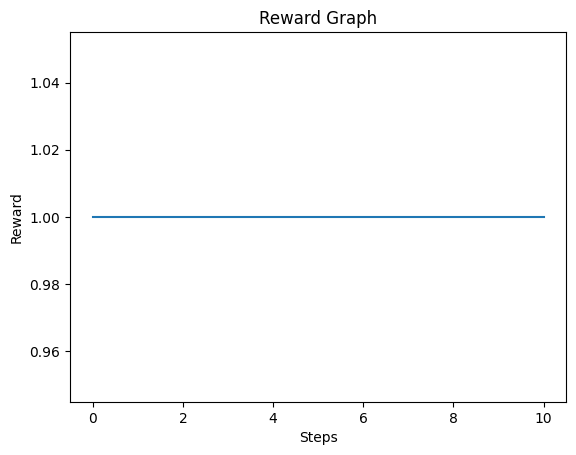

In [6]:
# Save the rewards and print the reward graph
plt.plot(rewards)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward Graph')
plt.show()

#### Environment Description

**CartPole-v1** in Gymnamsium's Classic Control environments is a simple 2D physics simulation. The environment consists of a pole attached to a cart, which can move along a frictionless track. The goal is to balance the pole upright by moving the cart left or right.

- **Action Space**: Discrete with two options: 0 (push cart left) and 1 (push cart right).
- **Observation Space**: Continuous, with four dimensions: cart position, cart velocity, pole angle, and pole angular velocity.
- **Rewards**: +1 for each time step with the pole balanced upright.
- **Starting State**: Random values assigned to observations within (-0.05, 0.05).
- **Episode End**: Conditions for termination include pole angle exceeding ±12°, cart position beyond ±2.4 units, or episode length surpassing 500 time steps.

Reference: https://gymnasium.farama.org/environments/classic_control/cart_pole/

### 3. Explore any other environment [MountainCar-v0]

In [7]:
# Explore the ‘MountainCar-v0’ environment
env = gym.make('MountainCar-v0', render_mode='rgb_array')


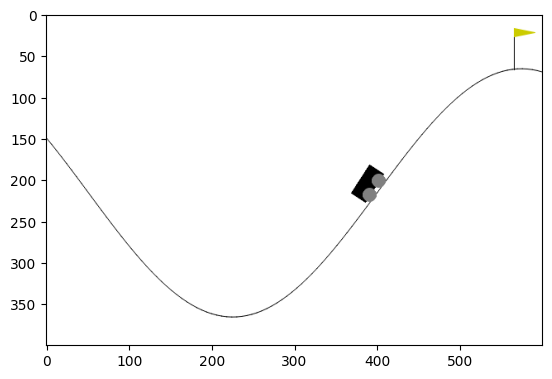

In [8]:
# Run the random agent for at least 1000 steps
agent = RandomAgent(env)

rewards = agent.run(1000)

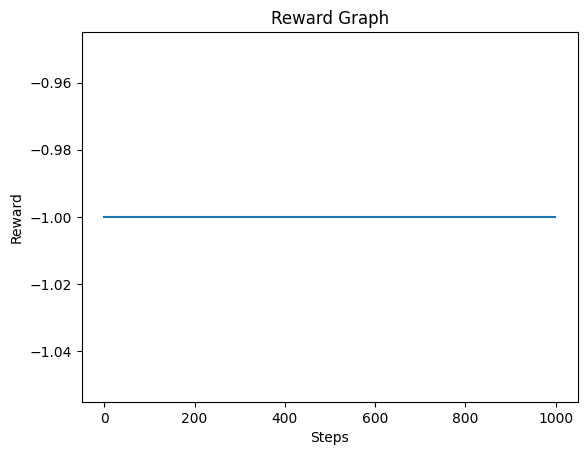

In [9]:
# Save the rewards and print the reward graph
plt.plot(rewards)
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Reward Graph')
plt.show()

#### Environment Description

**MountainCar-v0** in Gymnamsium's Classic Control environments is a 2D physics simulation. The environment consists of a car on a one-dimensional track, positioned between two hills. The goal is to drive the car up the right hill to reach the flag at the top.

- **Action Space:** Discrete(3) actions: accelerate left, don't accelerate, accelerate right.
- **Observation Space:** Box([position_min, velocity_min], [position_max, velocity_max], (2,), float32).
- **Transition Dynamics:** Velocity and position update based on current state and action.
- **Reward:** -1 reward per timestep; goal is to reach the flag on top of the right hill quickly.
- **Starting State:** Random position in [-0.6, -0.4], velocity starts at 0.
- **Episode End:** Termination at position >= 0.5 or after 200 timesteps.

Reference: https://gymnasium.farama.org/environments/classic_control/mountain_car/